In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

# Загрузка данных
data = pd.read_csv('fish_train.csv')

In [ ]:
# Разбиение данных на обучающую и тестовую выборки
train_data, test_data = train_test_split(data, test_size=0.2, random_state=41, stratify=data['Species'])

# Вычисление выборочного среднего для колонки Width в обучающей выборке
mean_width = train_data['Width'].mean()
print(f'Выборочное среднее ширины рыб в обучающей выборке: {mean_width:.3f}')

Выборочное среднее ширины рыб в обучающей выборке: 4.547


In [ ]:
# Удаление категориальных признаков
X_train = train_data.drop(['Species', 'Weight'], axis=1)
y_train = train_data['Weight']
X_test = test_data.drop(['Species', 'Weight'], axis=1)
y_test = test_data['Weight']

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Выполнение предсказаний
predictions = model.predict(X_test)

# Оценка модели
r2 = r2_score(y_test, predictions)
print(f'R^2 score: {r2:.3f}')

R^2 score: 0.886


In [ ]:
# Обучение PCA на трех наиболее коррелированных признаках тренировочных данных
pca = PCA(n_components=1)
train_lengths = pca.fit_transform(train_data[['Length1', 'Length2', 'Length3']])
test_lengths = pca.transform(test_data[['Length1', 'Length2', 'Length3']])
explained_variance_ratio = pca.explained_variance_ratio_[0]
print(f"Доля объясненной дисперсии первой главной компоненты: {explained_variance_ratio:.3f}")

Доля объясненной дисперсии первой главной компоненты: 0.996


In [ ]:
# Замена трех признаков на первую главную компоненту
X_train['Lengths'] = train_lengths
X_test['Lengths'] = test_lengths
# Удаление исходных признаков
X_train.drop(['Length1', 'Length2', 'Length3'], axis=1, inplace=True)
X_test.drop(['Length1', 'Length2', 'Length3'], axis=1, inplace=True)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
round(r2, 3)

0.872

In [ ]:
# Возведение всех значений в трех столбцах в куб
X_train[['Height', 'Width', 'Lengths']] = X_train[['Height', 'Width', 'Lengths']] ** 3
X_test[['Height', 'Width', 'Lengths']] = X_test[['Height', 'Width', 'Lengths']] ** 3

# Вычисляем средние значения каждого столбца
mean_height_cubed = X_train['Height'].mean()
mean_width_cubed = X_train['Width'].mean()
mean_lengths_cubed = X_train['Lengths'].mean()

print("Среднее значение столбца Height после возведения в куб:", mean_height_cubed)
print("Среднее значение столбца Width после возведения в куб:", round(mean_width_cubed, 3))
print("Среднее значение столбца Lengths после возведения в куб:", mean_lengths_cubed)


Среднее значение столбца Height после возведения в куб: 1320.7941246354872
Среднее значение столбца Width после возведения в куб: 126.765
Среднее значение столбца Lengths после возведения в куб: 1790.9637037858763


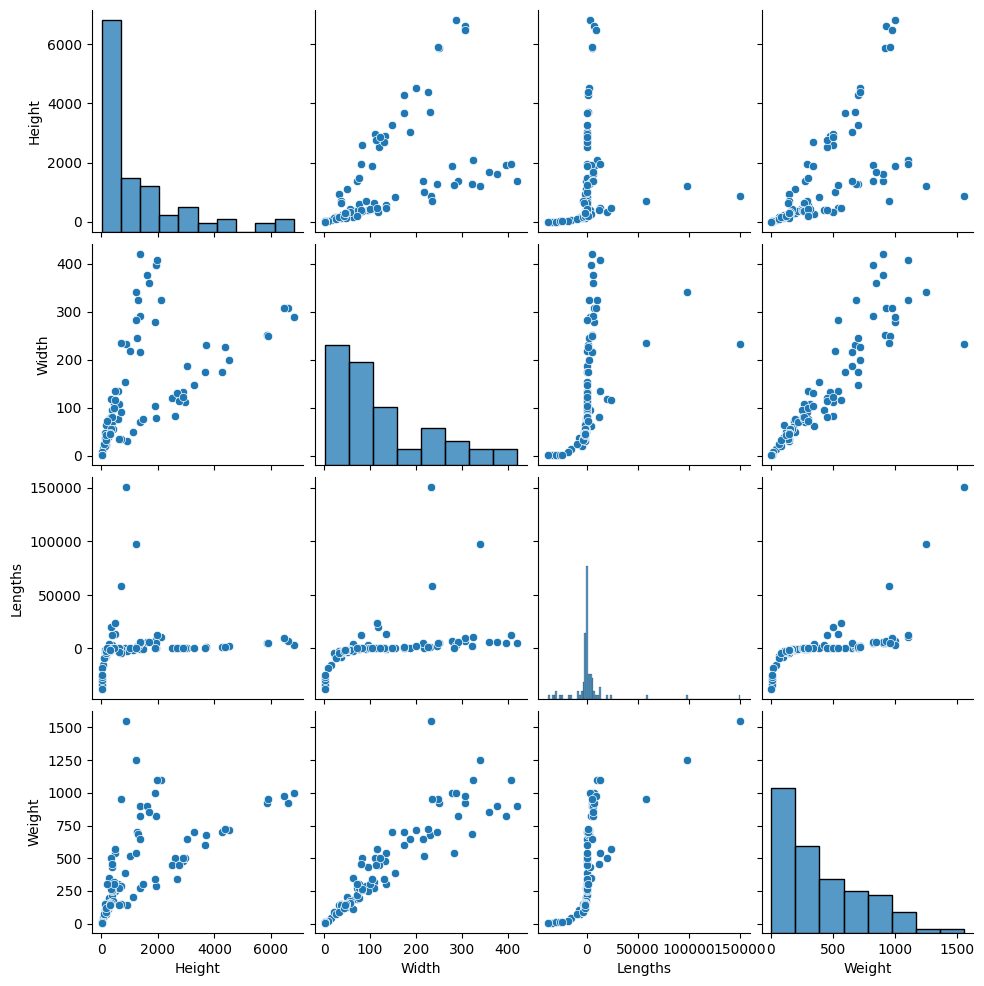

In [ ]:
data = X_train.copy()
data['Weight'] = y_train

# Построение графиков
sns.pairplot(data)

In [ ]:
# Обучающая модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания для тестового набора данных
y_pred = model.predict(X_test)

# Оценка модели с помощью метрики R2
r2 = r2_score(y_test, y_pred)
print("R2 score:", round(r2, 3))

R2 score: 0.902


In [ ]:
train_data_one_hot = pd.get_dummies(train_data, columns=['Species'], drop_first=True)
test_data_one_hot = pd.get_dummies(test_data, columns=['Species'], drop_first=True)

# Удаление категориальных признаков
X_train = train_data_one_hot.drop(['Weight'], axis=1)
y_train = train_data_one_hot['Weight']
X_test = test_data_one_hot.drop(['Weight'], axis=1)
y_test = test_data_one_hot['Weight']

pca = PCA(n_components=1)
train_lengths = pca.fit_transform(train_data[['Length1', 'Length2', 'Length3']])
test_lengths = pca.transform(test_data[['Length1', 'Length2', 'Length3']])

# Замена трех признаков на первую главную компоненту
X_train['Lengths'] = train_lengths
X_test['Lengths'] = test_lengths
# Удаление исходных признаков
X_train.drop(['Length1', 'Length2', 'Length3'], axis=1, inplace=True)
X_test.drop(['Length1', 'Length2', 'Length3'], axis=1, inplace=True)

X_train[['Height', 'Width', 'Lengths']] = X_train[['Height', 'Width', 'Lengths']] ** 3 + 47 * X_train[['Height', 'Width', 'Lengths']] ** 2 + 150 * X_train[['Height', 'Width', 'Lengths']]
X_test[['Height', 'Width', 'Lengths']] = X_test[['Height', 'Width', 'Lengths']] ** 3 + 47 * X_test[['Height', 'Width', 'Lengths']] ** 2 + 150 * X_test[['Height', 'Width', 'Lengths']]

min_value = min(X_train['Lengths'].min(), X_test['Lengths'].min())

# Если минимальное значение отрицательное, сдвигаем все значения, чтобы они стали положительными
if min_value < 0:
    shift = abs(min_value) + 1
else:
    shift = 0

X_train['Lengths'] = np.log(X_train['Lengths'] + shift + 1) ** 9
X_test['Lengths'] = np.log(X_test['Lengths'] + shift + 1) ** 9
print(X_train)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Выполнение предсказаний
predictions = model.predict(X_test)

# Оценка модели
r2 = r2_score(y_test, predictions)
print(f'R^2 score: {r2:.3f}')

           Height        Width  Species_Parkki  Species_Perch  Species_Pike  \
87    2262.861983   819.934922               0              0             0   
109   3446.211189  1512.795647               0              1             0   
86    1316.798132   657.171694               0              1             0   
12    4525.801994  1535.679475               0              1             0   
22     488.395177   272.534550               0              0             0   
..            ...          ...             ...            ...           ...   
45   19805.704643  2687.363121               0              0             0   
104   2573.336406  1508.168820               0              0             1   
89    3355.439418  1168.409338               0              0             0   
92   19115.999734  2481.068438               0              0             0   
96   19416.762387  2882.507229               0              0             0   

     Species_Roach  Species_Smelt  Species_Whitefis

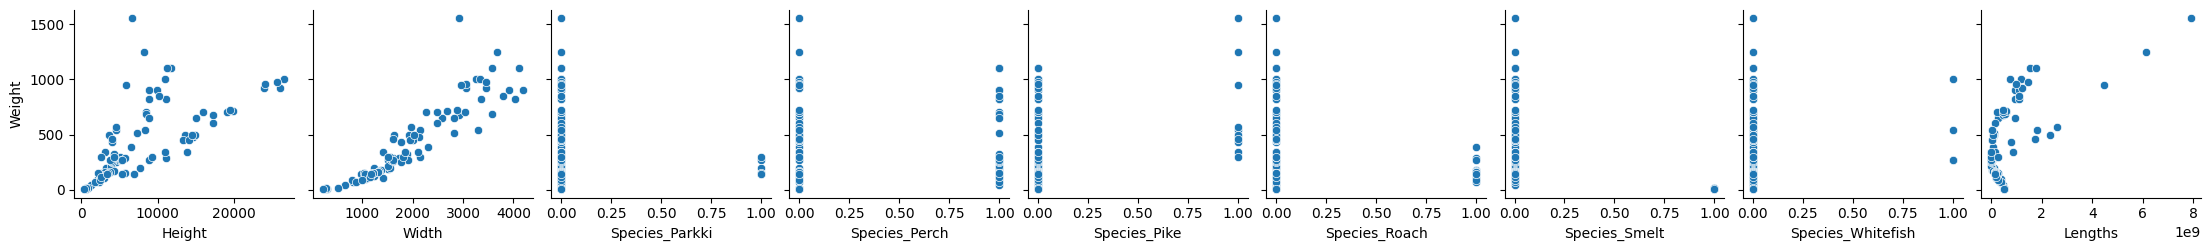

In [ ]:
data = X_train.copy()
data['Weight'] = y_train

# Построение графиков
sns.pairplot(data, y_vars=['Weight'], x_vars=data.columns.drop('Weight'))

In [ ]:
train_data_one_hot = pd.get_dummies(pd.read_csv('fish_train.csv'), columns=['Species'], drop_first=True)
test_data_one_hot = pd.get_dummies(pd.read_csv('fish_reserved.csv'), columns=['Species'], drop_first=True)

# Удаление категориальных признаков
X_train = train_data_one_hot.drop(['Weight'], axis=1)
y_train = train_data_one_hot['Weight']
X_test = test_data_one_hot
y_test = pd.DataFrame(['Weight'])

pca = PCA(n_components=1)
train_lengths = pca.fit_transform(train_data_one_hot[['Length1', 'Length2', 'Length3']])
test_lengths = pca.transform(test_data_one_hot[['Length1', 'Length2', 'Length3']])

# Замена трех признаков на первую главную компоненту
X_train['Lengths'] = train_lengths
X_test['Lengths'] = test_lengths
# Удаление исходных признаков
X_train.drop(['Length1', 'Length2', 'Length3'], axis=1, inplace=True)
X_test.drop(['Length1', 'Length2', 'Length3'], axis=1, inplace=True)

X_train[['Height', 'Width', 'Lengths']] = X_train[['Height', 'Width', 'Lengths']] ** 3 + 47 * X_train[['Height', 'Width', 'Lengths']] ** 2 + 150 * X_train[['Height', 'Width', 'Lengths']]
X_test[['Height', 'Width', 'Lengths']] = X_test[['Height', 'Width', 'Lengths']] ** 3 + 47 * X_test[['Height', 'Width', 'Lengths']] ** 2 + 150 * X_test[['Height', 'Width', 'Lengths']]

min_value = min(X_train['Lengths'].min(), X_test['Lengths'].min())

# Если минимальное значение отрицательное, сдвигаем все значения, чтобы они стали положительными
if min_value < 0:
    shift = abs(min_value) + 1
else:
    shift = 0

X_train['Lengths'] = np.log(X_train['Lengths'] + shift + 1) ** 9
X_test['Lengths'] = np.log(X_test['Lengths'] + shift + 1) ** 9
print(X_train)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Выполнение предсказаний
predictions = model.predict(X_test).tolist()
print(predictions)

           Height        Width  Species_Parkki  Species_Perch  Species_Pike  \
0     2649.775844  1278.569628               0              0             0   
1     3971.534974  1760.094678               0              1             0   
2    11071.689816  2144.245678               0              0             0   
3    25940.198384  3461.208025               0              0             0   
4     2561.352080  1172.165354               0              1             0   
..            ...          ...             ...            ...           ...   
114   8804.756201  1499.882410               1              0             0   
115   3657.908736  1978.389467               0              0             1   
116  10911.785590  3257.610328               0              0             0   
117   2899.207831  1096.409318               0              1             0   
118  11049.042865  4040.027165               0              1             0   

     Species_Roach  Species_Smelt  Species_Whitefis